Практична робота №6

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання (Регресія)

Epoch 1/200
25/25 [==============================] - 4s 38ms/step - loss: 5.9971 - val_loss: 4.4253
Epoch 2/200
25/25 [==============================] - 0s 16ms/step - loss: 3.2333 - val_loss: 1.7536
Epoch 3/200
25/25 [==============================] - 0s 15ms/step - loss: 1.3681 - val_loss: 1.0285
Epoch 4/200
25/25 [==============================] - 1s 28ms/step - loss: 1.1481 - val_loss: 1.0008
Epoch 5/200
25/25 [==============================] - 0s 14ms/step - loss: 1.1169 - val_loss: 0.9907
Epoch 6/200
25/25 [==============================] - 0s 14ms/step - loss: 1.0992 - val_loss: 0.9781
Epoch 7/200
25/25 [==============================] - 1s 21ms/step - loss: 1.0811 - val_loss: 0.9613
Epoch 8/200
25/25 [==============================] - 0s 15ms/step - loss: 1.0670 - val_loss: 0.9524
Epoch 9/200
25/25 [==============================] - 0s 13ms/step - loss: 1.0527 - val_loss: 0.9394
Epoch 10/200
25/25 [==============================] - 0s 17ms/step - loss: 1.0394 - val_loss: 0.9300

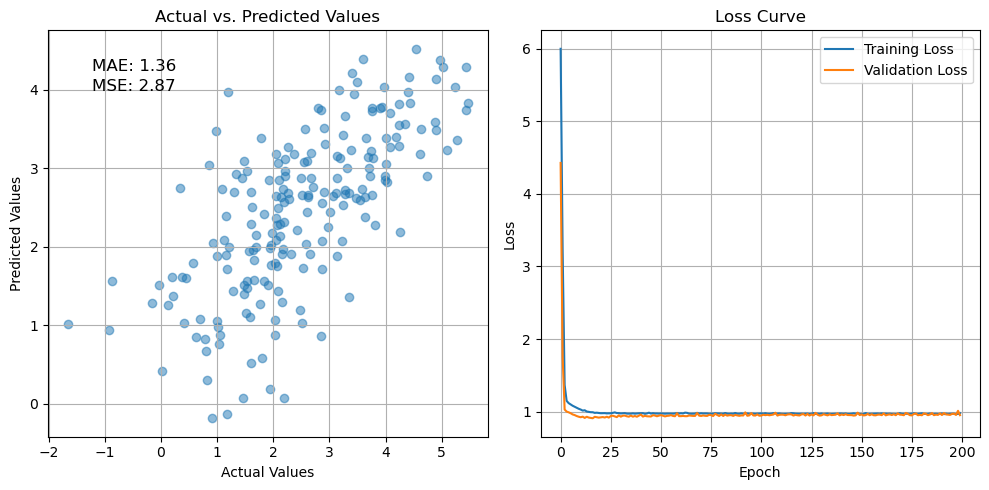

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

num_samples = 1000
num_features = 2
features = np.random.rand(num_samples, num_features)
target_values = 2 * features[:, 0] + 3 * features[:, 1] + np.random.randn(num_samples)

data = pd.DataFrame({'Feature_1': features[:, 0], 'Feature_2': features[:, 1], 'Target': target_values})
data.to_csv('PR6RegressionData.csv') 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')
features_train, features_val, target_train, target_val = train_test_split(features, target_values, test_size=0.2, random_state=42)
history = model.fit(features_train, target_train, epochs=200, validation_data=(features_val, target_val))

target_pred = model.predict(features_val)
mae = tf.keras.losses.MeanAbsoluteError()(target_val, target_pred).numpy()
print("Mean Absolute Error:", mae)
mse = tf.keras.losses.MeanSquaredError()(target_val, target_pred).numpy()
print("Mean Squared Error (MSE):", mse)

print("\nResults visualization")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(target_val, target_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Якщо побудувати більшу модель:

Epoch 1/200
25/25 [==============================] - 8s 60ms/step - loss: 5.5434 - val_loss: 3.3419
Epoch 2/200
25/25 [==============================] - 0s 18ms/step - loss: 2.0504 - val_loss: 1.0465
Epoch 3/200
25/25 [==============================] - 0s 20ms/step - loss: 1.1759 - val_loss: 1.0230
Epoch 4/200
25/25 [==============================] - 1s 35ms/step - loss: 1.1239 - val_loss: 0.9849
Epoch 5/200
25/25 [==============================] - 0s 17ms/step - loss: 1.0854 - val_loss: 0.9616
Epoch 6/200
25/25 [==============================] - 0s 18ms/step - loss: 1.0509 - val_loss: 0.9429
Epoch 7/200
25/25 [==============================] - 0s 16ms/step - loss: 1.0237 - val_loss: 0.9272
Epoch 8/200
25/25 [==============================] - 1s 25ms/step - loss: 1.0056 - val_loss: 0.9188
Epoch 9/200
25/25 [==============================] - 0s 15ms/step - loss: 0.9953 - val_loss: 0.9156
Epoch 10/200
25/25 [==============================] - 0s 15ms/step - loss: 0.9856 - val_loss: 0.9319

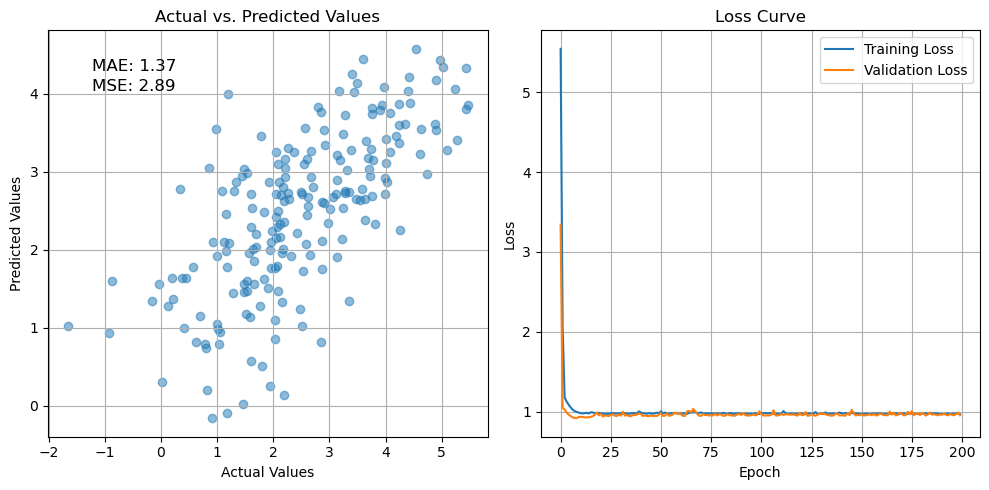

In [5]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('PR6RegressionData.csv')
features = data[['Feature_1', 'Feature_2']]
target_values = data['Target']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')
features_train, features_val, target_train, target_val = train_test_split(features, target_values, test_size=0.2, random_state=42)
history = model.fit(features_train, target_train, epochs=200, validation_data=(features_val, target_val))

target_pred = model.predict(features_val)
mae = tf.keras.losses.MeanAbsoluteError()(target_val, target_pred).numpy()
print("Mean Absolute Error:", mae)
mse = tf.keras.losses.MeanSquaredError()(target_val, target_pred).numpy()
print("Mean Squared Error (MSE):", mse)

print("\nResults visualization")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(target_val, target_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Якщо збільшити кількість нейронів у кожному шарі:

Epoch 1/200
25/25 [==============================] - 5s 37ms/step - loss: 5.1162 - val_loss: 2.1744
Epoch 2/200
25/25 [==============================] - 0s 18ms/step - loss: 1.3853 - val_loss: 1.1201
Epoch 3/200
25/25 [==============================] - 0s 17ms/step - loss: 1.1316 - val_loss: 0.9956
Epoch 4/200
25/25 [==============================] - 0s 17ms/step - loss: 1.0808 - val_loss: 0.9694
Epoch 5/200
25/25 [==============================] - 0s 17ms/step - loss: 1.0627 - val_loss: 0.9639
Epoch 6/200
25/25 [==============================] - 0s 16ms/step - loss: 1.0340 - val_loss: 0.9601
Epoch 7/200
25/25 [==============================] - 0s 20ms/step - loss: 1.0112 - val_loss: 0.9217
Epoch 8/200
25/25 [==============================] - 0s 18ms/step - loss: 1.0007 - val_loss: 0.9158
Epoch 9/200
25/25 [==============================] - 0s 18ms/step - loss: 1.0017 - val_loss: 0.9195
Epoch 10/200
25/25 [==============================] - 0s 18ms/step - loss: 0.9896 - val_loss: 0.9353

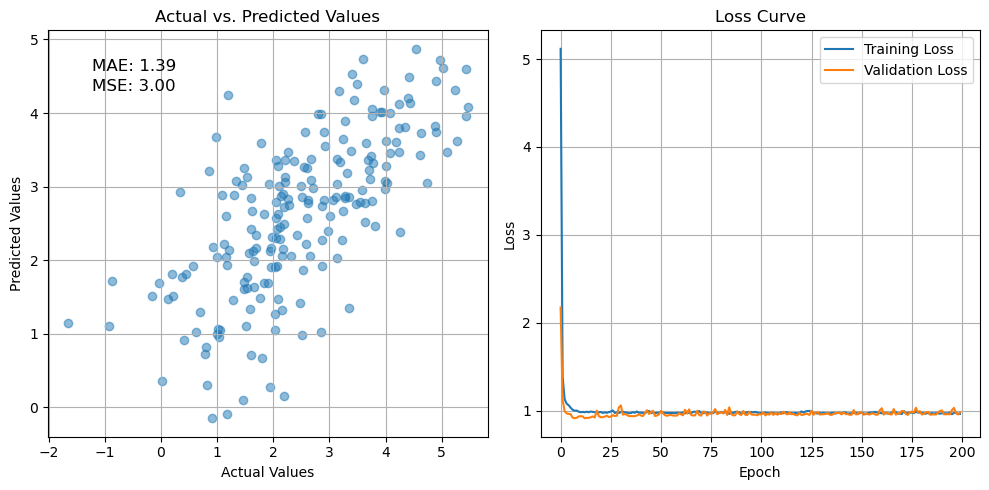

In [6]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('PR6RegressionData.csv')
features = data[['Feature_1', 'Feature_2']]
target_values = data['Target']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')
features_train, features_val, target_train, target_val = train_test_split(features, target_values, test_size=0.2, random_state=42)
history = model.fit(features_train, target_train, epochs=200, validation_data=(features_val, target_val))

target_pred = model.predict(features_val)
mae = tf.keras.losses.MeanAbsoluteError()(target_val, target_pred).numpy()
print("Mean Absolute Error:", mae)
mse = tf.keras.losses.MeanSquaredError()(target_val, target_pred).numpy()
print("Mean Squared Error (MSE):", mse)

print("\nResults visualization")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(target_val, target_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Якщо збільшити перший параметр Adam (learning_rate) в 10 разів

Epoch 1/200
25/25 [==============================] - 7s 45ms/step - loss: 2.3138 - val_loss: 1.0615
Epoch 2/200
25/25 [==============================] - 0s 18ms/step - loss: 1.0515 - val_loss: 0.9636
Epoch 3/200
25/25 [==============================] - 1s 24ms/step - loss: 1.0133 - val_loss: 0.9288
Epoch 4/200
25/25 [==============================] - 1s 25ms/step - loss: 1.0064 - val_loss: 0.9147
Epoch 5/200
25/25 [==============================] - 1s 24ms/step - loss: 1.0471 - val_loss: 1.0479
Epoch 6/200
25/25 [==============================] - 1s 29ms/step - loss: 1.0506 - val_loss: 0.9257
Epoch 7/200
25/25 [==============================] - 1s 28ms/step - loss: 1.0242 - val_loss: 1.1343
Epoch 8/200
25/25 [==============================] - 1s 23ms/step - loss: 1.0458 - val_loss: 1.0371
Epoch 9/200
25/25 [==============================] - 1s 33ms/step - loss: 1.0655 - val_loss: 1.0615
Epoch 10/200
25/25 [==============================] - 1s 26ms/step - loss: 1.0094 - val_loss: 0.9483

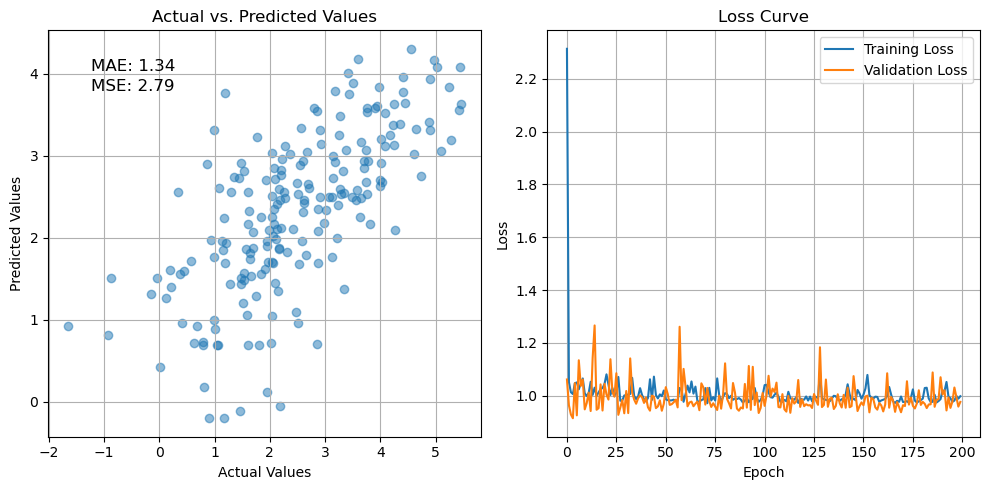

In [7]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('PR6RegressionData.csv')
features = data[['Feature_1', 'Feature_2']]
target_values = data['Target']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
features_train, features_val, target_train, target_val = train_test_split(features, target_values, test_size=0.2, random_state=42)
history = model.fit(features_train, target_train, epochs=200, validation_data=(features_val, target_val))

target_pred = model.predict(features_val)
mae = tf.keras.losses.MeanAbsoluteError()(target_val, target_pred).numpy()
print("Mean Absolute Error:", mae)
mse = tf.keras.losses.MeanSquaredError()(target_val, target_pred).numpy()
print("Mean Squared Error (MSE):", mse)

print("\nResults visualization")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(target_val, target_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Та якщо тренування буде трохи довше (300 замість 200)

Epoch 1/300
25/25 [==============================] - 6s 52ms/step - loss: 1.7363 - val_loss: 0.9453
Epoch 2/300
25/25 [==============================] - 0s 20ms/step - loss: 1.0346 - val_loss: 0.9243
Epoch 3/300
25/25 [==============================] - 0s 18ms/step - loss: 1.0090 - val_loss: 0.9389
Epoch 4/300
25/25 [==============================] - 1s 20ms/step - loss: 1.0221 - val_loss: 0.9426
Epoch 5/300
25/25 [==============================] - 0s 18ms/step - loss: 1.0013 - val_loss: 0.9413
Epoch 6/300
25/25 [==============================] - 0s 18ms/step - loss: 1.0971 - val_loss: 1.0464
Epoch 7/300
25/25 [==============================] - 0s 17ms/step - loss: 1.0828 - val_loss: 1.0647
Epoch 8/300
25/25 [==============================] - 0s 18ms/step - loss: 1.0174 - val_loss: 0.9400
Epoch 9/300
25/25 [==============================] - 0s 17ms/step - loss: 1.0352 - val_loss: 1.0352
Epoch 10/300
25/25 [==============================] - 0s 20ms/step - loss: 1.0013 - val_loss: 0.9987

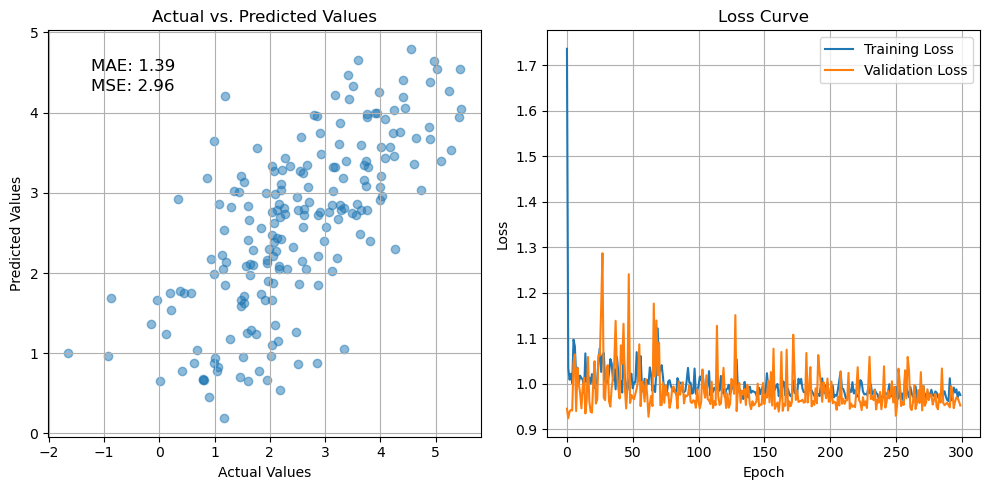

In [8]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('PR6RegressionData.csv')
features = data[['Feature_1', 'Feature_2']]
target_values = data['Target']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
features_train, features_val, target_train, target_val = train_test_split(features, target_values, test_size=0.2, random_state=42)
history = model.fit(features_train, target_train, epochs=300, validation_data=(features_val, target_val))

target_pred = model.predict(features_val)
mae = tf.keras.losses.MeanAbsoluteError()(target_val, target_pred).numpy()
print("Mean Absolute Error:", mae)
mse = tf.keras.losses.MeanSquaredError()(target_val, target_pred).numpy()
print("Mean Squared Error (MSE):", mse)

print("\nResults visualization")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(target_val, target_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()